In [1]:
%pylab qt
%matplotlib inline

from scipy.integrate import odeint

def plot_regime_libre(fp, Q):
    a  = -(2*np.pi*fp)**2     # g/l dans le cas du pendule
    damping = 2*np.pi*fp/Q
    f  = -damping  # frottements
    CI = [0*2*np.pi, 2]
    
    tau1 = 1/fp
    tau2 = 2*np.pi/(damping)

    tau = np.max([tau1, tau2])
    t = np.linspace(0, 3*tau,10000)

    def equation(Y,temps):                  # L'équation différentielle sous forme de fonction
        (y,dy)=Y                            # On décompose notre Y en (y,dy)
        return [dy,a*y+f*dy]           # On renvoie ce que vaut Y'

    Y, dY = odeint(equation, CI, t).T # Pour que odeint renvoit séparément les valeurs de Y et de Y',
                                      # il faut rajouter .T à la fin
    
    Y  /= Y.max()
    dY /= dY.max()

    plt.figure(figsize=(15,7.5))
    sps = (2,2)
    ax1 = plt.subplot2grid(sps, (0,0))
    ax1.plot(t, Y)
    ax1.set_ylabel("Position (a.u.)")
    ax1.set_xticklabels([])
    ax1 = plt.subplot2grid(sps, (1,0))
    ax1.plot(t, dY, "C1")
    ax1.set_xlabel("Temps (s)")
    ax1.set_ylabel("Vitesse (a.u.)")
    ax2 = plt.subplot2grid(sps, (0,1), rowspan=2)
    ax2.plot(Y, dY)
    ax2.set_xlabel("Position (u.a.)")
    ax2.set_ylabel("Vitesse (u.a.)")
    ax2.set_aspect("equal")
    
def plot_excitation(fp=1, fe=1, Q=100):
    a  = -(2*np.pi*fp)**2     # g/l dans le cas du pendule
    damping = 2*np.pi*fp/Q
    f  = -damping  # frottements
    CI = [0, 0]
    tau1 = 1/fp
    tau2 = 2*np.pi/(damping)
    if fp != fe:
        tau3 = np.abs(1/(fp-fe))
    else:
        tau3=0
    tau = np.max([20*tau1, tau2, tau3])
    t = np.linspace(0, 3*tau,10000)

    def equation(Y,temps):                  # L'équation différentielle sous forme de fonction
        (y,dy)=Y                            # On décompose notre Y en (y,dy)
        return [dy,a*y+f*dy-np.sin(2*np.pi*fe*temps)]                # On renvoie ce que vaut Y'

    Y, dY = odeint(equation, CI, t).T # Pour que odeint renvoit séparément les valeurs de Y et de Y',
                                      # il faut rajouter .T à la fin
        
    Y  /= Y.max()
    dY /= dY.max()

    plt.figure(figsize=(15,7.5))
    sps = (2,2)
    ax1 = plt.subplot2grid(sps, (0,0))
    ax1.plot(t, Y)
    ax1.set_ylabel("Position (a.u.)")
    ax1.set_xticklabels([])
    ax1 = plt.subplot2grid(sps, (1,0))
    ax1.plot(t, dY, "C1")
    ax1.set_ylabel("Vitesse (a.u.)")
    ax1.set_xlabel("Temps (s)")
    ax2 = plt.subplot2grid(sps, (0,1), rowspan=2)
    ax2.plot(Y, dY)
    ax2.set_xlabel("Position (u.a.)")
    ax2.set_ylabel("Vitesse (u.a.)")
    #ax2.set_aspect("equal")

Populating the interactive namespace from numpy and matplotlib


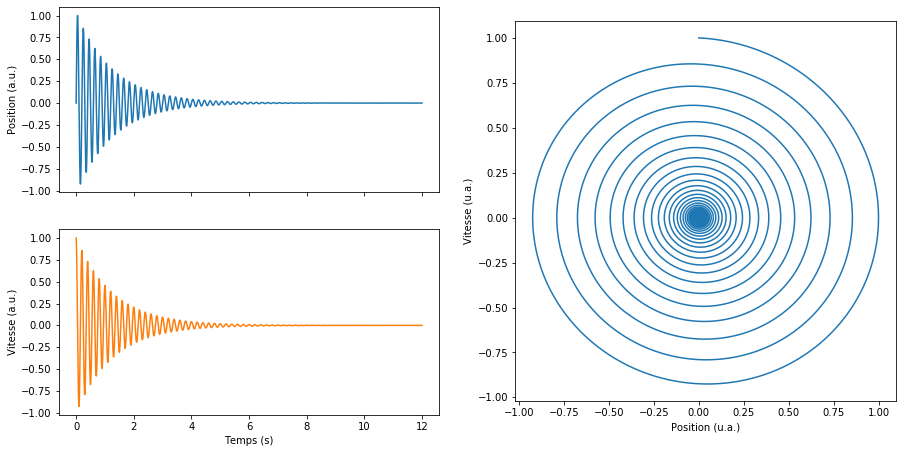

In [5]:
plot_regime_libre(fp=5, Q=20)

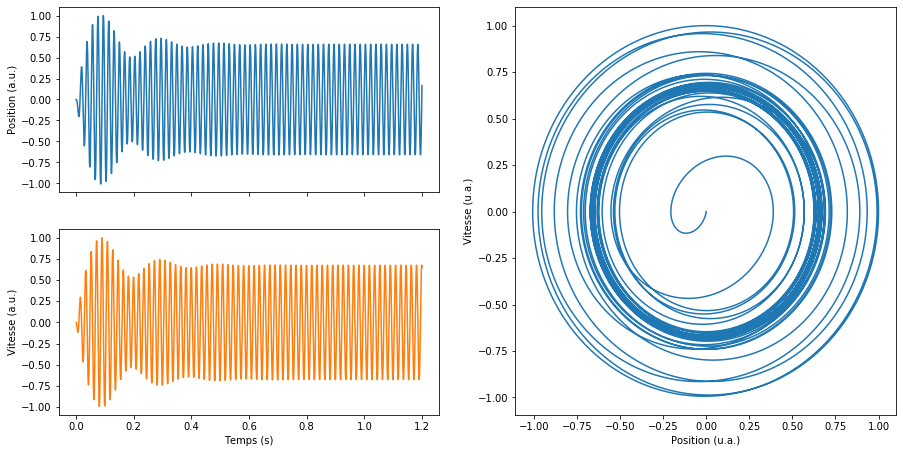

In [9]:
plot_excitation(fp=50, fe=55, Q=20)

In [3]:
l = 1
g = 9.81

omega = np.sqrt(g/l)

print(omega/2/np.pi)

0.498487916486281


# Cavité

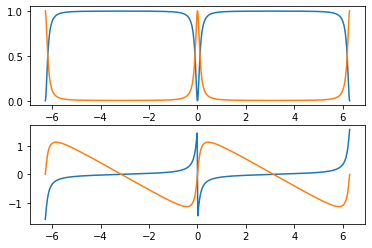

In [50]:
##### champ réfléchi (hecht p435)

r0 = 0.95

def reflected(phi, e0=1, r=r0):
    return r*e0 * (1-np.exp(1j*phi)) / (1-r**2*np.exp(1j*phi))

def transmitted(phi, e0=1, r=r0):
    return e0 * (1-r**2) / (1-r**2*np.exp(1j*phi))

phi = np.linspace(-2*np.pi, 2*np.pi, 1001)

plt.figure()
sps = (2,1)
ax1 = plt.subplot2grid(sps, (0,0))
ax2 = plt.subplot2grid(sps, (1,0))

reflection_int   = np.abs(reflected(phi))**2
transmission_int = np.abs(transmitted(phi))**2
ax1.plot(phi, reflection_int)
ax1.plot(phi, transmission_int)

reflection_angle   = np.angle(reflected(phi))
transmission_angle = np.angle(transmitted(phi))
ax2.plot(phi, reflection_angle)
ax2.plot(phi, transmission_angle)

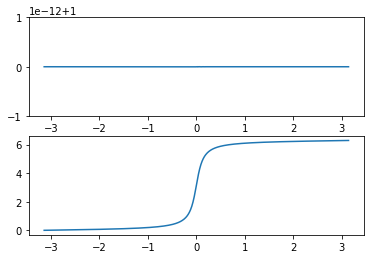

In [47]:
##### champ réfléchi pour une cavité avec un miroir totalement réfléchissant

r0 = 0.9

def reflected(phi, e0=1, r=r0):
    return e0 * (r - np.exp(1j*phi)) / (1 - r*np.exp(1j*phi))

phi = np.linspace(-np.pi, np.pi, 1001)

plt.figure()
sps = (2,1)
ax1 = plt.subplot2grid(sps, (0,0))
ax2 = plt.subplot2grid(sps, (1,0))

reflection_int   = np.abs(reflected(phi))**2
ax1.plot(phi, reflection_int)

reflection_angle   = np.angle(reflected(phi))
ax2.plot(phi, np.unwrap(reflection_angle))

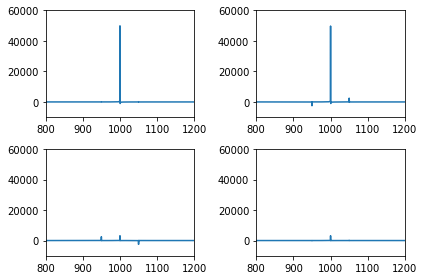

In [26]:
t = np.linspace(0,2, 100001)
fp = 1e3
fs = 50
a  = 0.1

Nt = len(t)
dt = t[1]-t[0]

porteuse = np.exp(1j*fp*2*np.pi*t)
mod      = a*np.sin(2*np.pi*fs*t)

am       = (1+mod) * porteuse 
am       = np.real(am)

pm = np.exp(1j*(fp*2*np.pi*t + mod))
pm = np.real(pm)

freqs = np.fft.rfftfreq(Nt, dt)
tfam  = np.fft.rfft(am)
tfpm  = np.fft.rfft(pm)

plt.figure()
sps = (2,2)
ax1 = plt.subplot2grid(sps, (0,0))
ax2 = plt.subplot2grid(sps, (1,0))
ax3 = plt.subplot2grid(sps, (0,1))
ax4 = plt.subplot2grid(sps, (1,1))

ax1.plot(freqs, np.real(tfam))
ax2.plot(freqs, np.imag(tfam))
ax3.plot(freqs, np.real(tfpm))
ax4.plot(freqs, np.imag(tfpm))

for ax in [ax1, ax2, ax3, ax4]:
    ax.set_xlim(fp-4*fs, fp+4*fs)
    ax.set_ylim(-10000, 60000)
plt.tight_layout()

(0, 0.05)

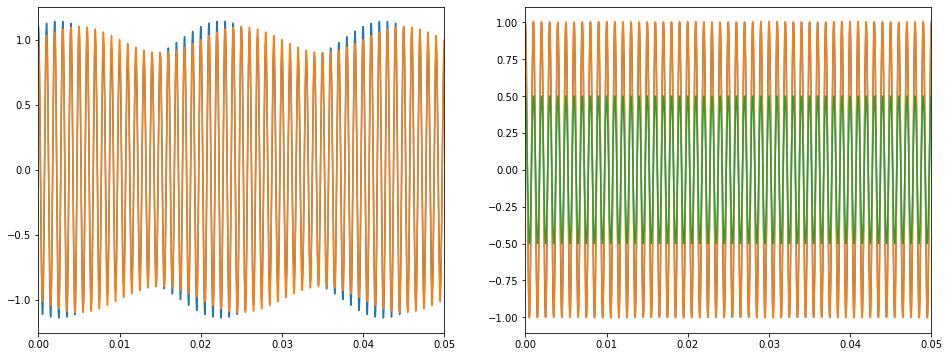

In [24]:
plt.figure(figsize=(16,6))
sps = (1,2)
ax1 = plt.subplot2grid(sps, (0,0))
ax2 = plt.subplot2grid(sps, (0,1))

amf = np.real(np.exp(1j*2*np.pi*fp*t) - 1j*a/2 * np.exp(1j*2*np.pi*(fp+fs)*t) + 1j*a/2 * np.exp(1j*2*np.pi*(fp-fs)*t))
ax1.plot(t, am)
ax1.plot(t, amf)
ax1.set_xlim(0,0.05)

pmf = np.real(np.exp(1j*2*np.pi*fp*t) + 1j * a/2 * np.exp(1j*2*np.pi*(fp+fs)*t) + 1j * a/2 * np.exp(1j*2*np.pi*(fp-fs)*t))
ax2.plot(t, pm)
ax2.plot(t, pmf)
ax2.plot(t, 0.5*np.cos(2*np.pi*fp*t))
ax2.set_xlim(0,0.05)
